Correlation with Life Expectancy:


,Pearson,Spearman
BMI,0.559255,0.581018
HIV/AIDS,-0.556457,-0.752131
thinness 1-19 years,-0.472162,-0.606616
thinness 5-9 years,-0.466629,-0.616804
Adult Mortality,-0.696359,-0.650804
Alcohol,0.391598,0.429390
Diphtheria,0.475418,0.544929
GDP,0.430493,0.544202
Hepatitis B,0.203771,0.315574
Income composition of resources,0.692483,0.829533


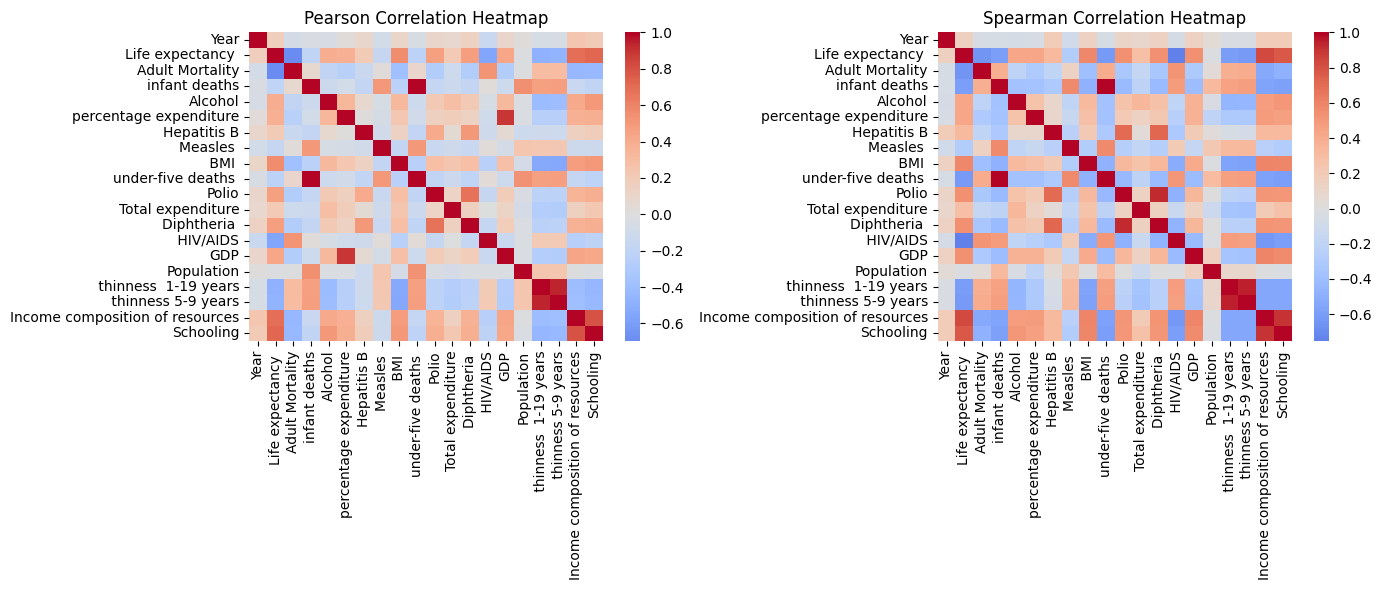

In [3]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Data
df = pd.read_csv("/content/life_expectancy_clean.csv")

#Select numeric columns only
numeric_df = df.select_dtypes(include='number')

#Compute Pearson and Spearman correlations with Life expectancy
pearson_corr = numeric_df.corr(method='pearson')["Life expectancy "].sort_values(ascending=False)
spearman_corr = numeric_df.corr(method='spearman')["Life expectancy "].sort_values(ascending=False)

#Create a table
correlation_summary = pd.DataFrame({
    "Pearson": pearson_corr,
    "Spearman": spearman_corr
})

print("Correlation with Life Expectancy:")
display(correlation_summary)

#Heatmaps for all numeric features
plt.figure(figsize=(14, 6))

# Pearson heatmap
plt.subplot(1, 2, 1)
sns.heatmap(numeric_df.corr(method='pearson'), cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")

# Spearman heatmap
plt.subplot(1, 2, 2)
sns.heatmap(numeric_df.corr(method='spearman'), cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()


there is correlation between (GDP and percentage expenditure), (under five deaths and infant deaths), (thinness 10-19 and 5-9) , (schooling and income composition of resoursces).


In [4]:
from scipy.stats import ttest_ind, f_oneway
print(df["Status"].unique())

# Split data into two groups
developed = df[df["Status"] == "Developed"]["Life expectancy "]
developing = df[df["Status"] == "Developing"]["Life expectancy "]

# Perform Independent Samples t-test
t_stat, p_val = ttest_ind(developed, developing, equal_var=False)  # Welch's t-test
print("Independent Samples t-test")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

['Developing' 'Developed']
Independent Samples t-test
T-statistic: 47.935, P-value: 0.0000


*Null Hypothesis : There is no difference in life expectancy between developed and developing countries.

*Alternative Hypothesis : There is a difference in life expectancy between developed and developing countries.

The t-test returned a p-value less than 0.05. So, we reject the null hypothesis and conclude that there is a statistically significant difference in life expectancy between developed and developing countries.

In [5]:
# Group data by year
grouped_by_year = [group["Life expectancy "] for name, group in df.groupby("Year")]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped_by_year)
print("\nANOVA: Life Expectancy across Years")
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")



ANOVA: Life Expectancy across Years
F-statistic: 5.828, P-value: 0.0000


*Null Hypothesis : The mean life expectancy is the same across all years.

*Alternative Hypothesis : At least one year has a different mean life expectancy.

we reject the null hypothesis as the One-Way ANOVA test returned a p-value less than 0.05.
So we conclude that the life expectancy varies significantly across years

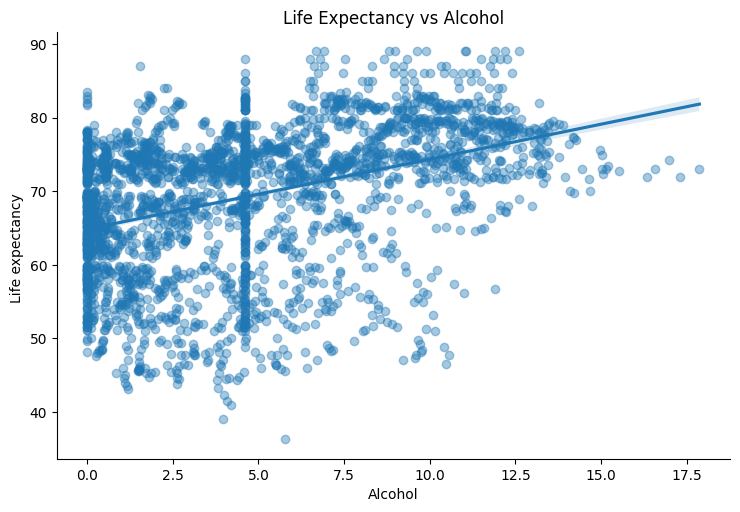

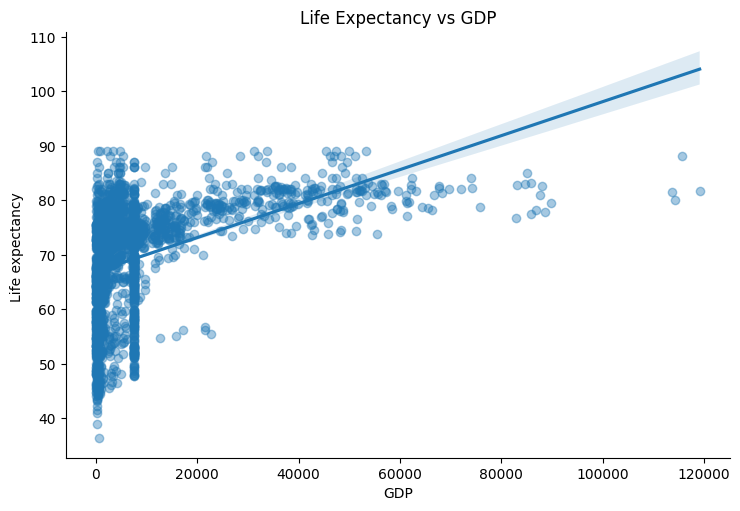

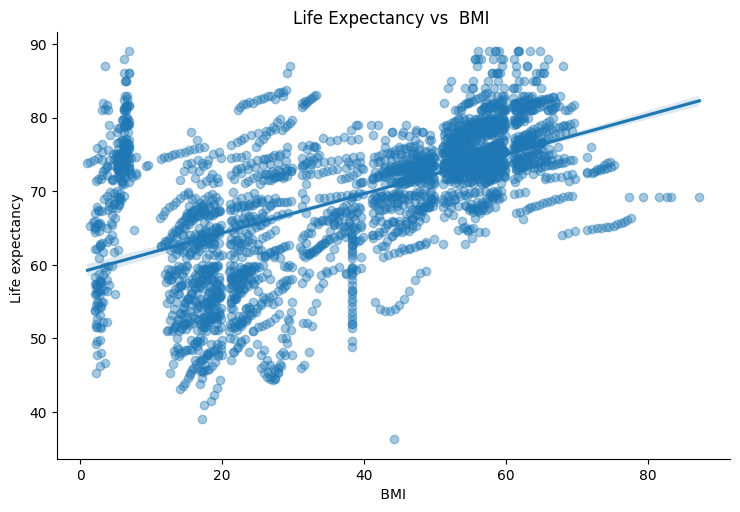

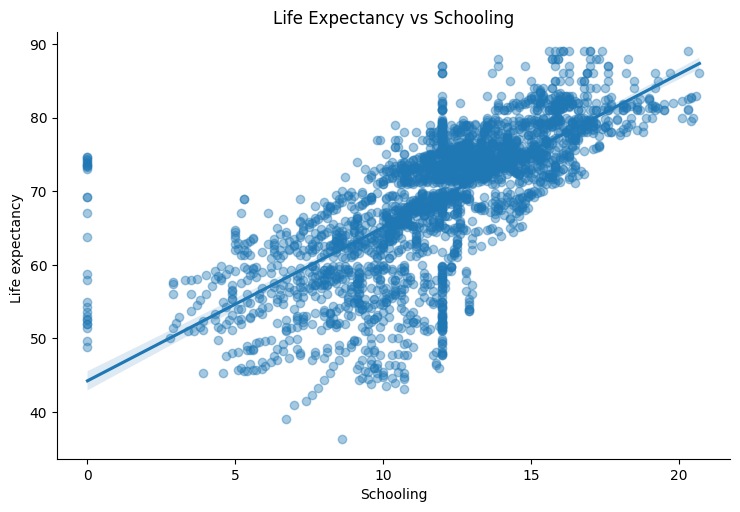

In [6]:
variables = ['Alcohol', 'GDP', " BMI ", 'Schooling']
for var in variables:
    sns.lmplot(data=df, x=var, y='Life expectancy ', aspect=1.5, height=5, scatter_kws={"alpha":0.4})
    plt.title(f'Life Expectancy vs {var}')
    plt.show()

*GDP : Countries with higher GDP tend to have higher life expectancy. This makes sense because wealthier countries often have better access to healthcare, nutrition, and education.(Positive Linear Relationship)

*Schooling : Higher average years of schooling are strongly associated with higher life expectancy. Education likely contributes to better health awareness, economic opportunities, and access to medical services. This is one of the strongest predictors among the four variables.(Strong Positive Linear Relationship)

*BMI : Adequate BMI levels tend to show higher life expectancy and very low BMI indicates malnutrition and lowers life expectancy.However beyond certain BMI, there is no improvement but could even reverse the nature of relationship.(moderate positive relationship)

*Alcohol : Countries with moderate alcohol consumption tend to have higher life expectancy.However the relationship is not strong ,this result might be possibly skewed by economic status or lifestyle factors.(very slight positive relationship, so not much influential)
